#  Covid Cases of a city on 1st September 2020

### importing the basic libraries

In [1]:
import numpy as np
import pandas as pd

Importing the training and the test datasets

In [11]:
train = pd.read_excel('Train_dataset.xlsx')
test = pd.read_excel('Test_dataset.xlsx')

In [13]:
train.head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,Maharashtra,M.C,12442373.0,11978450.0,878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115
1,Delhi,Delhi,M.C,11007835.0,9879172.0,858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188
2,Bangalore,Karnataka,MPUA,8436675.0,4301326.0,936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000
3,Hyderabad,Telangana,MPUA,6809970.0,3637483.0,930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123
4,Ahmedabad,Gujarat,MPUA,5570585.0,3520085.0,852.0,29.0,25.0,LOW,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204


In [14]:
test.head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors
0,Tuensang,Nagaland,T.C,36774.0,NaN,931.0,23.0,10.0,MEDIUM,94.0,114.0,0.253390,34237.0,17.0,2769.0
1,Lakshmeshwar,Karnataka,T.M.C,36754.0,NaN,934.0,25.0,38.0,HIGH,62.0,160.0,0.192555,34328.0,13.0,636502.0
2,Zira,Punjab,M.Cl.,36732.0,NaN,883.0,29.0,35.0,HIGH,63.0,105.0,0.887882,32434.0,17.0,242367.0
3,Yawal,Maharashtra,M.Cl,36706.0,NaN,887.0,26.0,31.0,HIGH,60.0,174.0,0.407838,32558.0,11.0,4408916.0
4,Thana Bhawan,Uttar Pradesh,N.P.,36669.0,NaN,877.0,28.0,39.0,LOW,92.0,153.0,0.324456,32159.0,23.0,3104060.0


#### we keep these as original copies of the data incase we need them again

In [15]:
train_org = train.copy()
test_org = test.copy()

#### overview of train dataset

In [16]:
train.describe()

,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
count,7.390000e+02,2.950000e+02,777.000000,769.000000,770.000000,761.000000,629.000000,647.000000,6.460000e+02,772.000000,6.970000e+02,787.00000
mean,3.102834e+05,5.320451e+05,905.712999,26.183355,30.941558,96.086728,150.373609,0.497069,2.910011e+05,41.849741,1.457945e+06,6615.64676
std,8.874849e+05,1.067831e+06,37.018542,2.113063,6.968289,30.532991,29.063767,0.293421,8.354348e+05,29.086939,1.664151e+06,15108.10276
min,3.677600e+04,2.935400e+04,818.000000,23.000000,5.000000,50.000000,100.000000,0.003074,3.091300e+04,10.000000,7.980000e+02,334.00000
25%,5.255000e+04,1.694320e+05,877.000000,24.000000,28.000000,70.000000,125.000000,0.238586,4.514450e+04,18.000000,2.378540e+05,2270.00000
50%,7.910600e+04,2.366000e+05,906.000000,26.000000,31.000000,92.000000,150.000000,0.507004,8.306750e+04,28.000000,6.365020e+05,2582.00000
75%,2.374765e+05,4.745850e+05,928.000000,28.000000,36.000000,119.000000,176.000000,0.752517,2.206772e+05,67.000000,3.104060e+06,8761.00000
max,1.244237e+07,1.197845e+07,1042.000000,32.000000,40.000000,227.000000,200.000000,0.999774,1.092440e+07,159.000000,4.684707e+06,218502.00000


In [18]:
train.shape

(787, 16)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               787 non-null    object 
 1   State              787 non-null    object 
 2   Type               787 non-null    object 
 3   Population [2011]  739 non-null    float64
 4   Popuation [2001]   295 non-null    float64
 5   Sex Ratio          777 non-null    float64
 6   Median Age         769 non-null    float64
 7   Avg Temp           770 non-null    float64
 8   SWM                783 non-null    object 
 9   Toilets Avl        761 non-null    float64
 10  Water Purity       629 non-null    float64
 11  H Index            647 non-null    float64
 12  Female Population  646 non-null    float64
 13  # of hospitals     772 non-null    float64
 14  Foreign Visitors   697 non-null    float64
 15  Covid Cases        787 non-null    int64  
dtypes: float64(11), int64(1), 

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

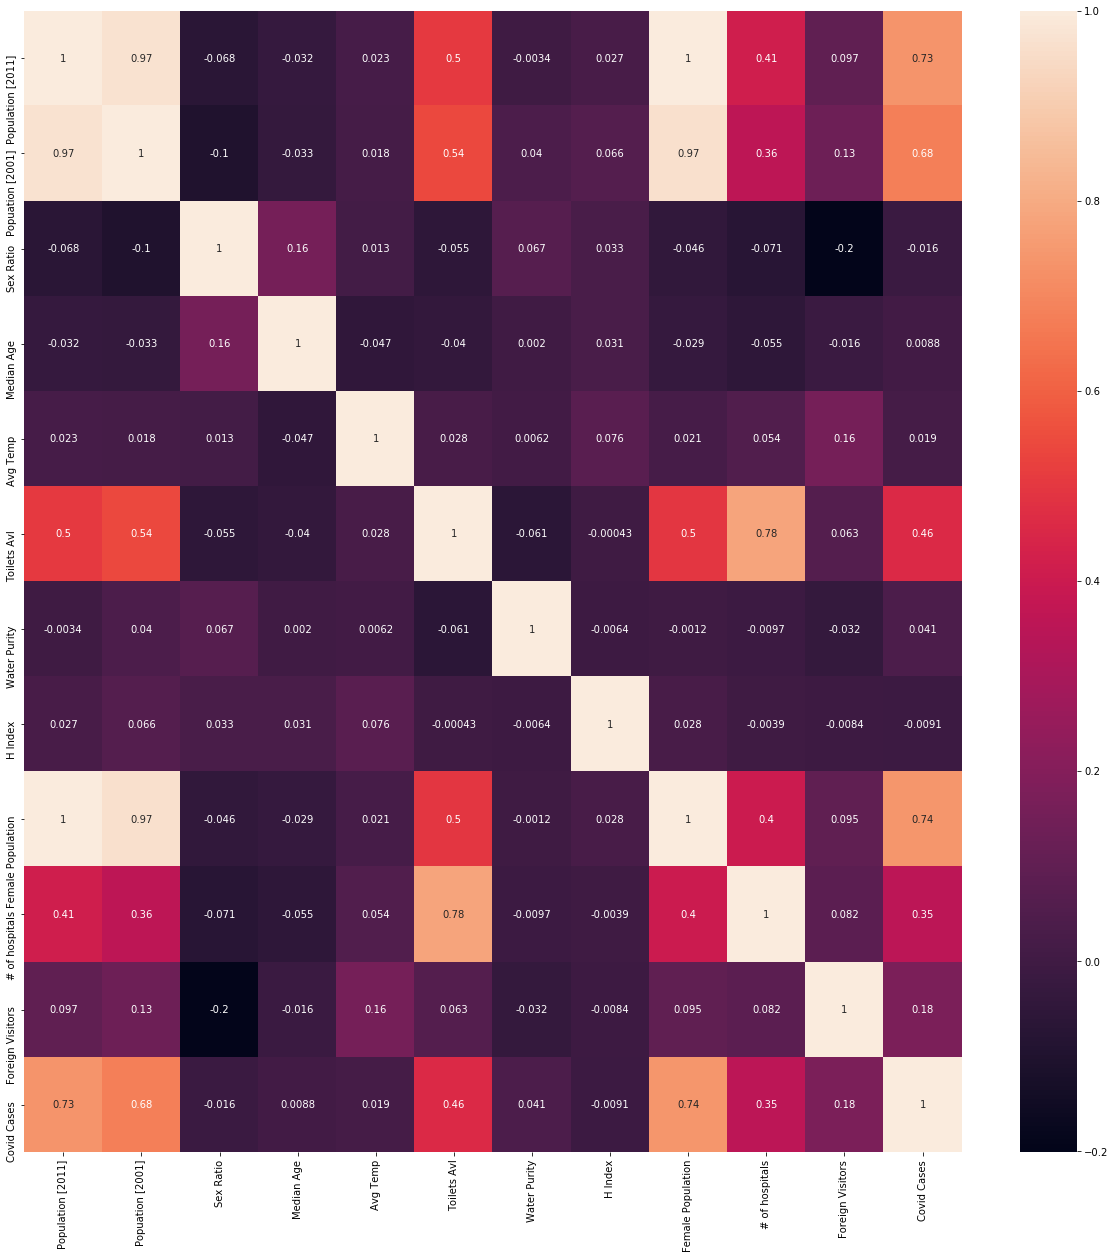

In [25]:
plt.figure(figsize =(21,21))
sns.heatmap(train.corr(), annot = True)

##### null values or missing values

In [17]:
train.isnull().sum()

City                   0
State                  0
Type                   0
Population [2011]     48
Popuation [2001]     492
Sex Ratio             10
Median Age            18
Avg Temp              17
SWM                    4
Toilets Avl           26
Water Purity         158
H Index              140
Female Population    141
# of hospitals        15
Foreign Visitors      90
Covid Cases            0
dtype: int64

#####  Since there are more than 60% of null values in population [2001] we drop it

In [31]:
train = train.drop(['Popuation [2001]'],axis = 1)

In [32]:
train.shape

(787, 15)

#### replacing the null values one by one

#### 1. Population [2011]

In [33]:
train["Population [2011]"].value_counts(normalize = True)

37802.0     0.002706
42461.0     0.002706
45858.0     0.002706
70777.0     0.002706
206167.0    0.002706
              ...   
711329.0    0.001353
52394.0     0.001353
67751.0     0.001353
126389.0    0.001353
283648.0    0.001353
Name: Population [2011], Length: 730, dtype: float64

In [34]:
train['Population [2011]'].mean()

310283.4167794317

In [35]:
train['Population [2011]'].median()

79106.0

In [36]:
train['Population [2011]'].mode()

0     37802.0
1     38554.0
2     42461.0
3     45858.0
4     49985.0
5     61632.0
6     65232.0
7     70777.0
8    206167.0
dtype: float64